In [1]:
%load_ext autoreload

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [21]:
# Importing the Data
data=pd.read_excel("C:\\Users\\rmaya\\OneDrive - Manipal Academy of Higher Education\\Desktop\\IABAC\\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")
data.shape

(1200, 28)

In [4]:
# Reading the first few lines
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [5]:
# Checking for the unique values
data['EmpDepartment'].value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [6]:
# Group by department and check which department has highest rating 
data.groupby("EmpDepartment")["PerformanceRating"].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

In [7]:
#Performance rating for employees in data science department is highest 
print("Number of employees in the data set is "+ str(len(data.index)))

Number of employees in the data set is 1200


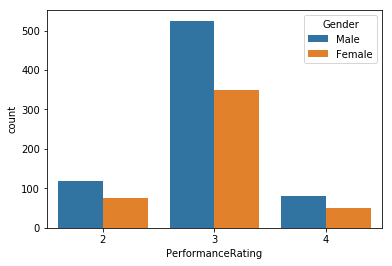

In [11]:
#Analyze the data 
import seaborn as sns
sns.countplot(x="PerformanceRating",hue="Gender",data=data)

In [12]:
# It can be  obvserved that most of the employees have performance rating of 3 and men outnumber women

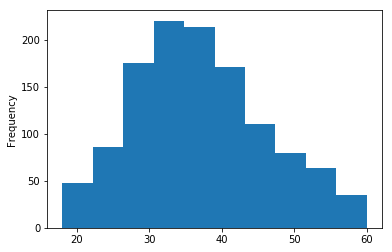

In [13]:
# To see the age distribution 
data["Age"].plot.hist()

In [14]:
# It can be obvserved that there are more people in the age group 30-40


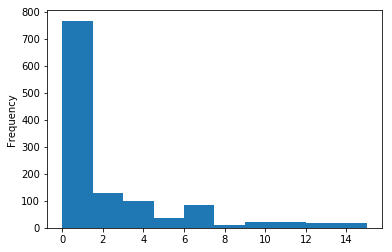

In [15]:
data["YearsSinceLastPromotion"].plot.hist()

In [16]:
# It can be seen that that most of the employees have been promoted in the recent times

In [17]:
# To check for missing values
data.isnull().values.any()

False

In [18]:
data["PerformanceRating"].unique()

array([3, 4, 2], dtype=int64)

In [41]:
# It has now become clear that this is a classification problem


In [42]:
# We need to convert the classification data in the numerical form.This is done using LabelEncoder
data.Gender=enc.fit_transform(data.Gender)
data.EducationBackground=enc.fit_transform(data.EducationBackground)
data.MaritalStatus=enc.fit_transform(data.MaritalStatus)
data.EmpDepartment=enc.fit_transform(data.EmpDepartment)
data.EmpJobRole=enc.fit_transform(data.EmpJobRole)
data.BusinessTravelFrequency=enc.fit_transform(data.BusinessTravelFrequency)
data.OverTime=enc.fit_transform(data.OverTime)
data.Attrition=enc.fit_transform(data.Attrition)


In [44]:
# Setting the target and predictor variable
X=data.iloc[:,1:27]
y=data.PerformanceRating


In [45]:
# Now I am going to split the data into two parts, one for training and one for testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [65]:
# The Random Forest is chosen over other algorithms because it uses the entire dataset optimally which reduces bias error. The algorithm is also famous for providing maximum reduction in variance as it gives the average output from an ensemble of several decision trees
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_jobs=5,oob_score=True,n_estimators=5000)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=5,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [72]:
# Checking for the accuracy of the data
y_predict=rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.925

In [71]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[ 56   7   0]
 [  4 254   6]
 [  1   9  23]]


In [109]:
# feature importance 
  
featImp=pd.DataFrame(data=rf.feature_importances_*100.0,columns=["GiniValue"])
#featImp=y

In [110]:
# featImp = pd.DataFrame(pd.np.empty((26, 1200)))  
featImp.sort_values(['GiniValue'],axis=0,ascending=False,inplace=True)
print(featImp.head())

    GiniValue
16  22.093562
9   19.491356
23   9.109800
5    4.197697
22   3.821252


In [111]:
# So it appears that the top three factors contributing to the performance of an employee are EmpLastSalaryHikePercent , EmpEnvironmentSatisfaction and YearsSinceLastPromotion .


In [ ]:
## Recommendations:
 # After careful evaluation of the drawn observations, we can recommend the following to increase employee performance at an
 # organization:
 # 1- Ensure a more improved rate of salary raises for the employees.
 # 2- Create a more friendly, comfortable and inclusive office environment.
 # 3- Help upgrade the skill sets of the current employees, so as to make them suitable to take up more responsibilities and 
 #    challenges, and in turn, prepare them for promotions